In [1]:
# Ran once and formed the \data1\split folder.
# import os
# import shutil
# import random

# # Define data directory
# data_dir = "data1/Indian-monuments/images"
# train_dir = "data1/split/Indian-monuments/images/train"
# val_dir = "data1/split/Indian-monuments/images/validation"
# test_dir = "data1/split/Indian-monuments/images/test"

# # Create directories for train, validation, and test sets if they don't exist
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Define the ratio for splitting the data
# train_ratio = 0.8
# val_ratio = 0.1
# test_ratio = 0.1

# # Get the list of class directories
# class_directories = [
#     directory
#     for directory in os.listdir(data_dir)
#     if os.path.isdir(os.path.join(data_dir, directory))
# ]

# # Iterate over each class directory
# for class_dir in class_directories:
#     # Get the list of image filenames for the current class
#     class_images = os.listdir(os.path.join(data_dir, class_dir))
#     # Shuffle the list of image filenames
#     random.shuffle(class_images)

#     # Calculate the number of images for each subset
#     num_train = int(len(class_images) * train_ratio)
#     num_val = int(len(class_images) * val_ratio)
#     num_test = len(class_images) - num_train - num_val

#     # Split the images into train, validation, and test sets
#     train_images = class_images[:num_train]
#     val_images = class_images[num_train : num_train + num_val]
#     test_images = class_images[num_train + num_val :]

#     # Copy images to their respective directories
#     for image in train_images:
#         src = os.path.join(data_dir, class_dir, image)
#         dst = os.path.join(train_dir, class_dir, image)
#         os.makedirs(os.path.dirname(dst), exist_ok=True)
#         shutil.copyfile(src, dst)

#     for image in val_images:
#         src = os.path.join(data_dir, class_dir, image)
#         dst = os.path.join(val_dir, class_dir, image)
#         os.makedirs(os.path.dirname(dst), exist_ok=True)
#         shutil.copyfile(src, dst)

#     for image in test_images:
#         src = os.path.join(data_dir, class_dir, image)
#         dst = os.path.join(test_dir, class_dir, image)
#         os.makedirs(os.path.dirname(dst), exist_ok=True)
#         shutil.copyfile(src, dst)

# # Now you can use the directories train_dir, val_dir, and test_dir for training, validation, and testing respectively.

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping

# import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import tensorflow as tf
import pandas as pd

In [3]:
train_dir = Path("data1/split/Indian-monuments/images/train")
train_filepaths = (
    list(train_dir.glob("**/*.jpg"))
    + list(train_dir.glob("*.jpeg"))
    + list(train_dir.glob("*.png"))
)
val_dir = Path("data1/split/Indian-monuments/images/validation")
val_filepaths = (
    list(val_dir.glob("**/*.jpg"))
    + list(val_dir.glob("*.jpeg"))
    + list(val_dir.glob("*.png"))
)
test_dir = Path("data1/split/Indian-monuments/images/test")
test_filepaths = (
    list(test_dir.glob("**/*.jpg"))
    + list(test_dir.glob("*.jpeg"))
    + list(test_dir.glob("*.png"))
)

In [4]:
def proc_img(filepath):
    labels = [str(filepath[i]).split("\\")[-2] for i in range(len(filepath))]
    print(labels)
    filepath = pd.Series(filepath, name="Filepath").astype(str)
    labels = pd.Series(labels, name="Label")
    df = pd.concat([filepath, labels], axis=1)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    return df


train_df = proc_img(train_filepaths)
val_df = proc_img(val_filepaths)
test_df = proc_img(test_filepaths)

['Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta Caves', 'Ajanta

In [5]:
train_df

,Filepath,Label
0,data1\split\Indian-monuments\images\train\gold...,golden temple
1,data1\split\Indian-monuments\images\train\Indi...,India gate pics
2,data1\split\Indian-monuments\images\train\Sun ...,Sun Temple Konark
3,data1\split\Indian-monuments\images\train\qutu...,qutub_minar
4,data1\split\Indian-monuments\images\train\jama...,jamali_kamali_tomb
...,...,...
2483,data1\split\Indian-monuments\images\train\jama...,jamali_kamali_tomb
2484,data1\split\Indian-monuments\images\train\hawa...,hawa mahal pics
2485,data1\split\Indian-monuments\images\train\Huma...,Humayun_s Tomb
2486,data1\split\Indian-monuments\images\train\Indi...,India gate pics


In [6]:
val_df

,Filepath,Label
0,data1\split\Indian-monuments\images\validation...,victoria memorial
1,data1\split\Indian-monuments\images\validation...,alai_darwaza
2,data1\split\Indian-monuments\images\validation...,charminar
3,data1\split\Indian-monuments\images\validation...,charminar
4,data1\split\Indian-monuments\images\validation...,alai_minar
...,...,...
303,data1\split\Indian-monuments\images\validation...,jamali_kamali_tomb
304,data1\split\Indian-monuments\images\validation...,charminar
305,data1\split\Indian-monuments\images\validation...,Gateway of India
306,data1\split\Indian-monuments\images\validation...,tajmahal


In [7]:
test_df

,Filepath,Label
0,data1\split\Indian-monuments\images\test\iron_...,iron_pillar
1,data1\split\Indian-monuments\images\test\golde...,golden temple
2,data1\split\Indian-monuments\images\test\jamal...,jamali_kamali_tomb
3,data1\split\Indian-monuments\images\test\Ajant...,Ajanta Caves
4,data1\split\Indian-monuments\images\test\Fateh...,Fatehpur Sikri
...,...,...
317,data1\split\Indian-monuments\images\test\iron_...,iron_pillar
318,data1\split\Indian-monuments\images\test\charm...,charminar
319,data1\split\Indian-monuments\images\test\Fateh...,Fatehpur Sikri
320,data1\split\Indian-monuments\images\test\Sun T...,Sun Temple Konark


In [8]:
unique_labels = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()
train_df["Label"].nunique()

24

In [9]:
val_df["Label"].nunique()

24

In [10]:
test_df["Label"].nunique()

24

In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model

# Define data generators with preprocessing function for MobileNetV2
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
)

val_images = val_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
)

base_model = MobileNetV2(
    weights="imagenet", include_top=False, pooling="avg", input_shape=(224, 224, 3)
)
base_model.trainable = False


# adding custom head

x = base_model.output
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(train_df["Label"].nunique(), activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(train_images, validation_data=val_images, epochs=10, verbose=1)

predicted_labels = model.predict(test_images)
label_mapping = {v: k for k, v in train_images.class_indices.items()}

# Convert predicted labels to class names
predicted_classes = [label_mapping[np.argmax(label)] for label in predicted_labels]

# Convert true labels to class names
true_classes = [label_mapping[label] for label in test_images.labels]

for i in range(10):
    print(f"True label: {true_classes[i]}, Predicted label: {predicted_classes[i]}")

from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {100 * acc:.2f}%")

Found 2488 validated image filenames belonging to 24 classes.
Found 308 validated image filenames belonging to 24 classes.
Found 322 validated image filenames belonging to 24 classes.
Epoch 1/10


C:\Users\CHARVI UPRETI\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 435ms/step - accuracy: 0.4391 - loss: 2.0987 - val_accuracy: 0.8636 - val_loss: 0.5311
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 34s 412ms/step - accuracy: 0.9107 - loss: 0.3381 - val_accuracy: 0.8994 - val_loss: 0.4223
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 34s 420ms/step - accuracy: 0.9683 - loss: 0.1581 - val_accuracy: 0.9286 - val_loss: 0.2914
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 34s 403ms/step - accuracy: 0.9852 - loss: 0.0711 - val_accuracy: 0.9221 - val_loss: 0.2922
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 33s 400ms/step - accuracy: 0.9952 - loss: 0.0396 - val_accuracy: 0.9221 - val_loss: 0.2992
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 34s 423ms/step - accuracy: 0.9940 - loss: 0.0257 - val_accuracy: 0.9253 - val_loss: 0.3386
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 34s 408ms/step - accuracy: 0.9957 - loss: 0.0255 - val_accuracy: 0.9416 - val_loss: 0.2933
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 35s 413ms/step - accuracy: 0.9988 - loss: 0.0092 - val_accuracy: 0.931

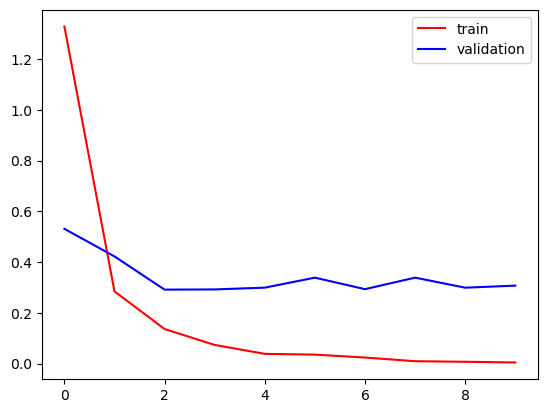

In [12]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="validation")
plt.legend()
plt.show()

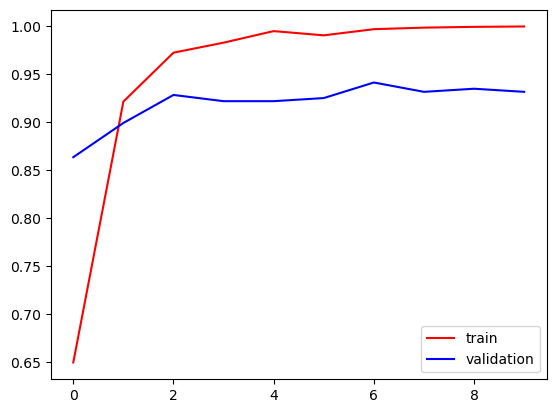

In [13]:
plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()
plt.show()

In [21]:
label_mapping

{0: 'Ajanta Caves',
 1: 'Charar-E- Sharif',
 2: 'Chhota_Imambara',
 3: 'Ellora Caves',
 4: 'Fatehpur Sikri',
 5: 'Gateway of India',
 6: 'Humayun_s Tomb',
 7: 'India gate pics',
 8: 'Khajuraho',
 9: 'Sun Temple Konark',
 10: 'alai_darwaza',
 11: 'alai_minar',
 12: 'basilica_of_bom_jesus',
 13: 'charminar',
 14: 'golden temple',
 15: 'hawa mahal pics',
 16: 'iron_pillar',
 17: 'jamali_kamali_tomb',
 18: 'lotus_temple',
 19: 'mysore_palace',
 20: 'qutub_minar',
 21: 'tajmahal',
 22: 'tanjavur temple',
 23: 'victoria memorial'}

In [15]:
predicted_labels = model.predict(test_images)
label_mapping = {v: k for k, v in train_images.class_indices.items()}

# Convert predicted labels to class names
predicted_classes = [label_mapping[np.argmax(label)] for label in predicted_labels]

# Convert true labels to class names
true_classes = [label_mapping[label] for label in test_images.labels]

for i in range(10):
    print(f"True label: {true_classes[i]}, Predicted label: {predicted_classes[i]}")

from sklearn.metrics import accuracy_score

acc = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {100 * acc:.2f}%")

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 434ms/step
True label: iron_pillar, Predicted label: iron_pillar
True label: golden temple, Predicted label: golden temple
True label: jamali_kamali_tomb, Predicted label: tajmahal
True label: Ajanta Caves, Predicted label: Ajanta Caves
True label: Fatehpur Sikri, Predicted label: Fatehpur Sikri
True label: Gateway of India, Predicted label: Gateway of India
True label: qutub_minar, Predicted label: qutub_minar
True label: Humayun_s Tomb, Predicted label: Humayun_s Tomb
True label: mysore_palace, Predicted label: mysore_palace
True label: victoria memorial, Predicted label: victoria memorial
Accuracy: 95.34%


In [22]:
import pickle

# Save label mapping
with open("label_mapping.pkl", "wb") as f:
    pickle.dump(label_mapping, f)

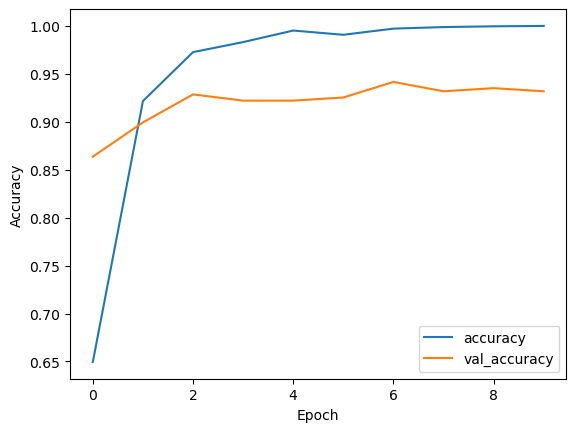

In [23]:
import matplotlib.pyplot as plt

# Save training history
with open("training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)

# Visualize training history
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

In [16]:
predicted_labels

array([[6.1545733e-09, 1.7173469e-09, 9.8331228e-13, ..., 2.0937395e-10,
        1.2116215e-08, 2.9851569e-13],
       [4.4058834e-10, 7.1160270e-05, 3.7703802e-07, ..., 4.9128039e-06,
        4.3800705e-07, 7.0754832e-06],
       [2.1478602e-04, 3.8859656e-04, 3.1879841e-04, ..., 5.0161684e-01,
        1.9461420e-05, 2.4103497e-04],
       ...,
       [8.0004436e-05, 1.3904857e-04, 3.4722825e-06, ..., 3.7558441e-06,
        4.0307161e-03, 2.1941692e-07],
       [1.5790325e-06, 9.3066221e-09, 2.6890565e-10, ..., 1.9452341e-07,
        4.2071109e-04, 1.2717807e-06],
       [3.9016133e-05, 2.4103468e-08, 1.9063555e-12, ..., 8.8220267e-09,
        1.6326537e-07, 3.3141068e-10]], dtype=float32)

In [17]:
# Define the file path to save the predicted classes
output_file = "predicted_classes.txt"

# Write the predicted classes to the file
with open(output_file, "w") as file:
    for predicted_class in predicted_classes:
        file.write(predicted_class + "\n")

print("Predicted classes saved to", output_file)

Predicted classes saved to predicted_classes.txt


In [ ]:
model.save(f"model_with_mobilenetv2_{100 * acc:.2f}.h5")

In [ ]:
import keras

keras.saving.save_model(model, f"model_with_mobilenetv2_{100 * acc:.2f}.keras")

In [ ]:
import pickle

with open("label_mapping.pkl", "wb") as f:
    pickle.dump(label_mapping, f)

print("Label mapping saved successfully.")